In [1]:
import pandas as pd
import numpy as np

# UAE E-commerce customer segments
customer_types = ['UAE Local', 'Western Expat', 'Asian Expat', 'GCC Tourist', 'Russian Tourist']
product_categories = ['Electronics', 'Fashion', 'Home & Kitchen', 'Beauty', 'Baby Products', 'Grocery']

# Create 1000 customers
np.random.seed(42)
n_customers = 1000

data = []
for i in range(n_customers):
    customer_type = np.random.choice(customer_types, p=[0.3, 0.25, 0.25, 0.1, 0.1])
    
    # UAE-specific spending patterns
    if customer_type == 'UAE Local':
        avg_order_value = np.random.randint(500, 2000)
        electronics_ratio = 0.4
    elif customer_type == 'Western Expat':
        avg_order_value = np.random.randint(300, 1500)
        electronics_ratio = 0.5
    else:  # Tourists
        avg_order_value = np.random.randint(200, 1000)
        electronics_ratio = 0.3
    
    # Customer metrics
    tenure_months = np.random.randint(1, 36)
    total_orders = np.random.randint(1, 50)
    days_since_last_order = np.random.randint(1, 90)
    
    # Will churn? (UAE-specific: Expats leave, tourists one-time)
    if customer_type in ['Western Expat', 'Asian Expat'] and tenure_months > 24:
        will_churn = np.random.choice([0, 1], p=[0.3, 0.7])
    elif customer_type in ['GCC Tourist', 'Russian Tourist']:
        will_churn = 1  # One-time purchasers
    else:
        will_churn = np.random.choice([0, 1], p=[0.8, 0.2])
    
    data.append({
        'customer_id': f'CUST_{1000+i}',
        'customer_type': customer_type,
        'tenure_months': tenure_months,
        'total_orders': total_orders,
        'avg_order_value_aed': avg_order_value,
        'total_spent_aed': total_orders * avg_order_value,
        'days_since_last_order': days_since_last_order,
        'preferred_category': np.random.choice(product_categories),
        'uses_app': np.random.choice([0, 1], p=[0.4, 0.6]),
        'newsletter_subscribed': np.random.choice([0, 1], p=[0.5, 0.5]),
        'has_returned_item': np.random.choice([0, 1], p=[0.85, 0.15]),
        'will_churn': will_churn
    })

df_customers = pd.DataFrame(data)
print(f"Created {len(df_customers)} UAE e-commerce customers")
print(df_customers.head())

Created 1000 UAE e-commerce customers
  customer_id  customer_type  tenure_months  total_orders  \
0   CUST_1000  Western Expat             15            43   
1   CUST_1001    Asian Expat              3            22   
2   CUST_1002    Asian Expat             22            44   
3   CUST_1003      UAE Local              3            37   
4   CUST_1004    GCC Tourist             26             2   

   avg_order_value_aed  total_spent_aed  days_since_last_order  \
0                 1160            49880                     72   
1                  863            18986                     53   
2                  513            22572                     89   
3                 1457            53909                     51   
4                  976             1952                     84   

  preferred_category  uses_app  newsletter_subscribed  has_returned_item  \
0            Fashion         0                      0                  1   
1             Beauty         1                

In [2]:
df = pd.read_csv('uae_ecommerce_customers.csv')
ecommerce = df

df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1


In [3]:
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1


In [4]:
# Q1: Which customer type has highest average spend
df.groupby('customer_type')['total_spent_aed'].mean().sort_values(ascending=False).round(2)


customer_type
UAE Local          30745.19
Western Expat      22375.04
Asian Expat        16706.67
GCC Tourist        14355.16
Russian Tourist    14158.30
Name: total_spent_aed, dtype: float64

In [5]:
df.groupby('customer_type')['total_spent_aed'].mean().idxmax()


'UAE Local'

In [6]:
# Q2: What's the churn rate by customer segment?
df.groupby('customer_type')['will_churn'].mean().round(2).sort_values(ascending = False).astype(int)*100

customer_type
GCC Tourist        100
Russian Tourist    100
Asian Expat          0
Western Expat        0
UAE Local            0
Name: will_churn, dtype: int32

In [7]:
churn_rate = (
    df.groupby('customer_type')['will_churn']
    .mean()
    .reset_index(name='churn_rate_percent')
)

churn_rate['churn_rate_percent'] *= 100
churn_rate


,customer_type,churn_rate_percent
0,Asian Expat,37.272727
1,GCC Tourist,100.000000
2,Russian Tourist,100.000000
3,UAE Local,22.044728
4,Western Expat,37.209302


In [8]:
# Q3: How does app usage affect order frequency?
df.groupby('uses_app')['total_orders'].mean().round(2)


uses_app
0    25.06
1    24.50
Name: total_orders, dtype: float64

In [9]:
df['predicted_months'] = (df['days_since_last_order'] / 30).round(1)


In [10]:
# Feature Engineering
df['customer_lifetime'] = df.total_spent_aed * df.predicted_months
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6


In [11]:
df['purchase_frequency']= df.total_orders / df.tenure_months
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime,purchase_frequency
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0,2.866667
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8,7.333333
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0,2.000000
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3,12.333333
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6,0.076923


In [12]:
df['risk_score']= df.days_since_last_order*np.where (
 df.has_returned_item == 1,
 1 ,
0.5)

In [13]:
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime,purchase_frequency,risk_score
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0,2.866667,72.0
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8,7.333333,53.0
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0,2.000000,89.0
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3,12.333333,51.0
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6,0.076923,42.0


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg= LogisticRegression()
x = df[['tenure_months',
        'total_orders',
        'avg_order_value_aed',
        'total_spent_aed',
        'days_since_last_order',
        'uses_app',
        'newsletter_subscribed',
        'has_returned_item']]

y = df['will_churn']

In [16]:
reg.fit(x,y)

C:\Users\hplap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
customer = df[df['customer_id'] == 'CUST_1000'][x.columns]
reg.predict(customer)


array([0], dtype=int64)

In [18]:
customer = df[df['customer_id'] == 'CUST_1001'][x.columns]
reg.predict(customer)


array([0], dtype=int64)

In [19]:
reg.predict_proba(customer)



array([[0.7084957, 0.2915043]])

In [20]:
reg.score(x,y)

0.652

In [21]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators = 300,max_depth = 8,random_state = 42)

In [22]:
model.fit(x,y)

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42)

In [23]:
customer = df[df['customer_id'] == 'CUST_1001'][x.columns]
model.predict(customer)


array([1], dtype=int64)

In [24]:
model.score(x,y)

0.877

In [25]:
#Regression: Predict customer_lifetime_value
from sklearn.ensemble import RandomForestRegressor

model1= RandomForestRegressor(n_estimators = 300,max_depth = 8,random_state = 42)
X= df[['tenure_months',
        'total_orders',
        'avg_order_value_aed',
        'total_spent_aed',
        'days_since_last_order',
        'uses_app',
        'newsletter_subscribed',
        'has_returned_item']]
y = df['customer_lifetime']

In [26]:
model1.fit(X,y)

RandomForestRegressor(max_depth=8, n_estimators=300, random_state=42)

In [27]:
df['predicted_lifetime_value'] = model1.predict(X).round(2)
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime,purchase_frequency,risk_score,predicted_lifetime_value
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0,2.866667,72.0,120561.24
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8,7.333333,53.0,33743.87
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0,2.000000,89.0,63332.09
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3,12.333333,51.0,90065.91
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6,0.076923,42.0,5396.46


In [28]:
customer = df[df['customer_id'] == 'CUST_1001'][x.columns]
model1.predict(customer)


array([33743.86907347])

In [29]:
customer = df[df['customer_id']== 'CUST_1002'][x.columns]
model1.predict(customer)

array([63332.09120021])

In [30]:
#Clustering: Segment customers for targeted marketing
features = ['tenure_months',
            'total_orders',
            'avg_order_value_aed',
            'total_spent_aed',
            'days_since_last_order',
            'uses_app',
            'newsletter_subscribed',
            'has_returned_item']
X = df[features]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_Scaled = scaler.fit_transform(X)

In [32]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters = 3,random_state =42)
df['cluster']=kmeans.fit_predict(x_Scaled)

In [33]:
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime,purchase_frequency,risk_score,predicted_lifetime_value,cluster
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0,2.866667,72.0,120561.24,2
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8,7.333333,53.0,33743.87,0
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0,2.000000,89.0,63332.09,1
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3,12.333333,51.0,90065.91,2
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6,0.076923,42.0,5396.46,0


In [34]:
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


         tenure_months  total_orders  avg_order_value_aed  total_spent_aed  \
cluster                                                                      
0            18.815461     17.975062           756.675810     11998.189526   
1            19.054878     21.756098           778.948171     15261.228659   
2            17.878229     38.298893          1221.944649     45139.833948   

         days_since_last_order  uses_app  newsletter_subscribed  \
cluster                                                           
0                    43.827930  1.000000               0.451372   
1                    44.048780  0.000000               0.484756   
2                    46.361624  0.719557               0.468635   

         has_returned_item  
cluster                     
0                 0.134663  
1                 0.149390  
2                 0.177122  


 cluster_summary = df.groupby('cluster')[['total_spent_aed','days_since_last_order','total_orders']].mean().round(2)
print(cluster_summary)


In [36]:
cluster_summary = df.groupby('cluster')[['total_spent_aed','days_since_last_order','total_orders']].mean().round(2)
print(cluster_summary)


         total_spent_aed  days_since_last_order  total_orders
cluster                                                      
0               11998.19                  43.83         17.98
1               15261.23                  44.05         21.76
2               45139.83                  46.36         38.30


In [37]:
cluster_names = {0: 'Medium', 1: 'High', 2: 'VIP'}
df['customer_segment'] = df['cluster'].map(cluster_names)
df.head()

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,has_returned_item,will_churn,predicted_months,customer_lifetime,purchase_frequency,risk_score,predicted_lifetime_value,cluster,customer_segment
0,CUST_1000,Western Expat,15,43,1160,49880,72,Fashion,0,0,1,0,2.4,119712.0,2.866667,72.0,120561.24,2,VIP
1,CUST_1001,Asian Expat,3,22,863,18986,53,Beauty,1,0,1,1,1.8,34174.8,7.333333,53.0,33743.87,0,Medium
2,CUST_1002,Asian Expat,22,44,513,22572,89,Home & Kitchen,0,0,1,0,3.0,67716.0,2.000000,89.0,63332.09,1,High
3,CUST_1003,UAE Local,3,37,1457,53909,51,Electronics,0,1,1,0,1.7,91645.3,12.333333,51.0,90065.91,2,VIP
4,CUST_1004,GCC Tourist,26,2,976,1952,84,Beauty,1,0,0,1,2.8,5465.6,0.076923,42.0,5396.46,0,Medium


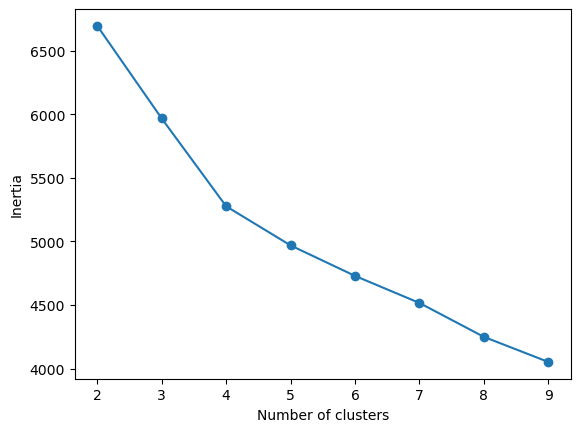

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_Scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()





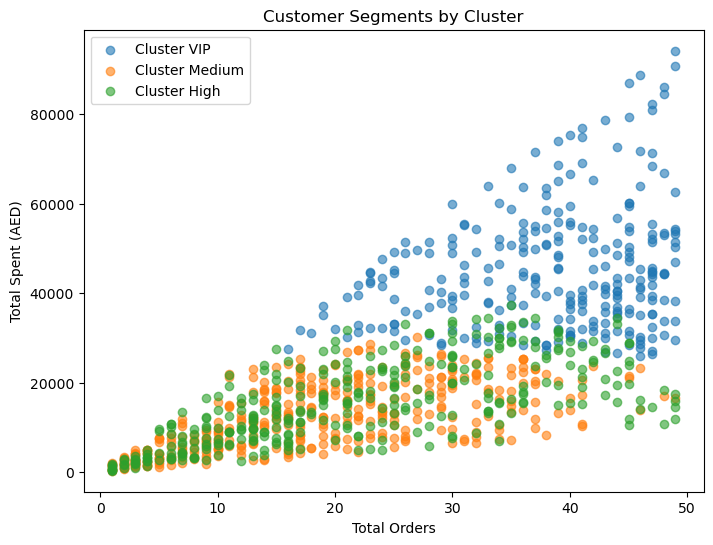

In [39]:
import matplotlib.pyplot as plt

# Plotting clusters
plt.figure(figsize=(8,6))
for cluster in df['customer_segment'].unique():
    cluster_data = df[df['customer_segment'] == cluster]
    plt.scatter(
        cluster_data['total_orders'],
        cluster_data['total_spent_aed'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Total Orders')
plt.ylabel('Total Spent (AED)')
plt.title('Customer Segments by Cluster')
plt.legend()
plt.show()


In [40]:
import pandas as pd

# Suppose your DataFrame is called df
df.to_csv('final_data.csv', index=False)


In [41]:
## Group customers into behavioral clusters using K-Means
# Example: "Big Spenders", "Frequent Shoppers", "One-time Buyers", "At-risk Customers"

In [42]:
df['total_spent_aed']=df['total_spent_aed'].astype(float)

In [43]:
feature1 = ['total_spent_aed',
           'total_orders',
           'avg_order_value_aed',
           'days_since_last_order']
x = df[feature1]

In [44]:
scaler2= StandardScaler()
x_scaled = scaler2.fit_transform(x)

In [45]:
kmeans=KMeans(n_clusters = 4,random_state = 42)
df['cluster1']= kmeans.fit_predict(x_scaled)

In [46]:
df.groupby('cluster1')[feature1].mean().round(0).astype(int)

,total_spent_aed,total_orders,avg_order_value_aed,days_since_last_order
cluster1,,,,
0,11223,9,1175,49
1,18063,27,682,19
2,14194,24,576,67
3,49478,38,1330,48


In [47]:
cluster_label = {
    0 : ' Big Spender',
    1 : ' Frequent Shoppers',
    2 : 'One-time Buyers',
    3 : 'At-risk Customers'
}
df['cluster_labels']=df['cluster1'].map(cluster_label)

In [48]:
df

,customer_id,customer_type,tenure_months,total_orders,avg_order_value_aed,total_spent_aed,days_since_last_order,preferred_category,uses_app,newsletter_subscribed,...,will_churn,predicted_months,customer_lifetime,purchase_frequency,risk_score,predicted_lifetime_value,cluster,customer_segment,cluster1,cluster_labels
0,CUST_1000,Western Expat,15,43,1160,49880.0,72,Fashion,0,0,...,0,2.4,119712.0,2.866667,72.0,120561.24,2,VIP,3,At-risk Customers
1,CUST_1001,Asian Expat,3,22,863,18986.0,53,Beauty,1,0,...,1,1.8,34174.8,7.333333,53.0,33743.87,0,Medium,2,One-time Buyers
2,CUST_1002,Asian Expat,22,44,513,22572.0,89,Home & Kitchen,0,0,...,0,3.0,67716.0,2.000000,89.0,63332.09,1,High,2,One-time Buyers
3,CUST_1003,UAE Local,3,37,1457,53909.0,51,Electronics,0,1,...,0,1.7,91645.3,12.333333,51.0,90065.91,2,VIP,3,At-risk Customers
4,CUST_1004,GCC Tourist,26,2,976,1952.0,84,Beauty,1,0,...,1,2.8,5465.6,0.076923,42.0,5396.46,0,Medium,0,Big Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST_1995,Asian Expat,29,24,962,23088.0,48,Baby Products,0,1,...,1,1.6,36940.8,0.827586,24.0,36817.58,1,High,2,One-time Buyers
996,CUST_1996,Western Expat,6,7,968,6776.0,37,Beauty,0,0,...,0,1.2,8131.2,1.166667,37.0,8048.27,1,High,0,Big Spender
997,CUST_1997,Western Expat,27,26,1026,26676.0,52,Home & Kitchen,1,0,...,1,1.7,45349.2,0.962963,26.0,46035.57,0,Medium,2,One-time Buyers
998,CUST_1998,UAE Local,26,47,1107,52029.0,70,Beauty,0,1,...,0,2.3,119666.7,1.807692,35.0,120610.64,2,VIP,3,At-risk Customers


In [49]:
from sklearn.decomposition import PCA

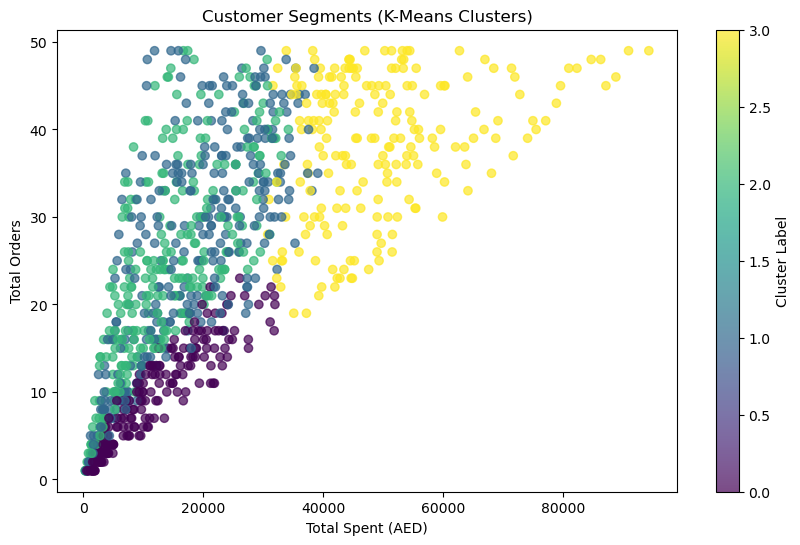

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


sc = plt.scatter(
    df["total_spent_aed"],
    df["total_orders"],
    c=df["cluster1"],
    alpha=0.7
)

plt.xlabel("Total Spent (AED)")
plt.ylabel("Total Orders")
plt.title("Customer Segments (K-Means Clusters)")

cbar = plt.colorbar(sc)
cbar.set_label("Cluster Label")

plt.show()



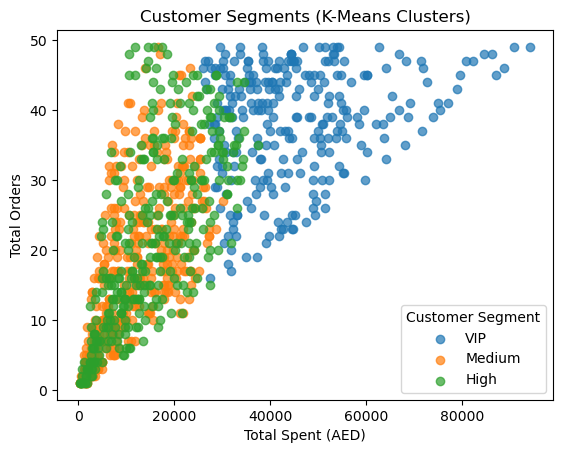

In [51]:
for segment in df["customer_segment"].unique():
    subset = df[df["customer_segment"] == segment]
    plt.scatter(
        subset["total_spent_aed"],
        subset["total_orders"],
        label=segment,    # this creates the legend entry
        alpha=0.7
    )

plt.xlabel("Total Spent (AED)")
plt.ylabel("Total Orders")
plt.title("Customer Segments (K-Means Clusters)")
plt.legend(title="Customer Segment")  # shows legend
plt.show()


In [52]:
# AB TESTING
#Hypothesis:
# Offering a small cashback reward (e.g., AED 10–20) for app users?

In [117]:
from scipy.stats import ttest_ind
# Split groups
app_users= df[df['uses_app'] == 1]
non_app_users  = df[df['uses_app'] == 0]


# T-test on PRICE
stat, p_value = ttest_ind(
    app_users['total_spent_aed'],
    non_app_users['total_spent_aed'],
    equal_var=False
)

print("A/B TEST: CASHBACK REWARD")
print(f"app_users Avg Price:{app_users['total_spent_aed'].mean():,.0f} AED")
print(f"non_app_users Avg Price:{non_app_users['total_spent_aed'].mean():,.0f} AED")

difference = ((app_users['total_spent_aed'].mean() / non_app_users['total_spent_aed'].mean()) - 1) * 100
print(f"Difference: {difference:.1f}%")

print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant: {'YES' if p_value < 0.05 else 'NO'}")

A/B TEST: CASHBACK REWARD
app_users Avg Price:22,104 AED
non_app_users Avg Price:21,970 AED
Difference: 0.6%
P-value: 0.9047
Statistically Significant: NO


In [ ]:
#Which customer segment contributes the most revenue?

In [163]:
more = df.groupby('customer_segment')['total_spent_aed'].sum().sort_values(ascending = False)
more_m = (more/100000).round(2).astype(str) + "M"
more_m

customer_segment
VIP       122.33M
High       50.06M
Medium     48.11M
Name: total_spent_aed, dtype: object

In [ ]:
# hypothesis 
#“Does subscribing to the newsletter increase total spending among customers?”

In [165]:
# split groups
subscibed = df[df['newsletter_subscribed']==1]
non_subscribed =  df[df['newsletter_subscribed']==0]


# T-test on PRICE
stat, p_value = ttest_ind(
    subscibed['total_spent_aed'],
    non_subscribed['total_spent_aed'],
    equal_var=False
)

print("A/B TEST: CASHBACK REWARD")
print(f"subscibed Avg Price:{subscibed['total_spent_aed'].mean():,.0f} AED")
print(f"non_subscribed Avg Price:{non_subscribed['total_spent_aed'].mean():,.0f} AED")

difference = ((subscibed['total_spent_aed'].mean() / non_subscribed['total_spent_aed'].mean()) - 1) * 100
print(f"Difference: {difference:.1f}%")

print(f"P-value: {p_value:.4f}")
print(f"Statistically Significant: {'YES' if p_value < 0.05 else 'NO'}")

A/B TEST: CASHBACK REWARD
subscibed Avg Price:21,655 AED
non_subscribed Avg Price:22,396 AED
Difference: -3.3%
P-value: 0.4997
Statistically Significant: NO
